# 使用CNN來做圖像辨識


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
PATH="/content/drive/My Drive/ML_assets/number_image"#路徑
os.chdir(PATH)
os.getcwd()

'/content/drive/My Drive/ML_assets/number_image'

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision  #圖片的數據庫總之很多東西
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 下載MNIST數據

檢查指定路徑內有沒有MNIST資料，沒有再載

In [ ]:
if os.path.exists('./MNIST/')==True:
  # not mnist dir or mnist is empyt dir
  DOWNLOAD_MNIST = False

In [ ]:
train_data = torchvision.datasets.MNIST(
    root = PATH,    #我要把資料仔在這邊
    train = True,   #  True = 訓練集, False = 測試集
    transform = torchvision.transforms.ToTensor(), #[0~255]轉成[0~1] 將圖片資料轉為tensor形式
    download = DOWNLOAD_MNIST #有沒有載過該資料集 有=False 沒有=True

)

## 來看看下載的圖片

train_data_size : torch.Size([60000, 28, 28])
train_data_lable_size : torch.Size([60000])


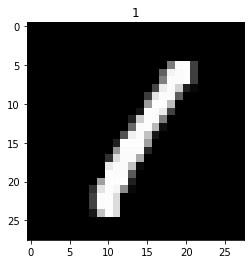

In [ ]:
print("train_data_size : {}".format(train_data.train_data.size()))
print("train_data_lable_size : {}".format(train_data.train_labels.size()))
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

# 批訓練參數

In [ ]:
EPOCH = 1               
BATCH_SIZE = 50
LR = 0.001              
DOWNLOAD_MNIST = True 

In [ ]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   
# shape from (2000, 28, 28) to (2000, 1, 28, 28),[:2000]/255.trans value range(0,255) in range(0,1)
test_y = test_data.test_labels[:2000]

# 建立CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization